In [10]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

[-0.91125485  1.30023561  0.05678473 -0.58922892  0.71083552  0.4700759
 -0.16832873 -0.30094071 -0.36786842 -0.83556607 -0.84786339 -1.14570871
  1.44405531 -0.82245517 -0.34469202 -1.07258506 -1.48150218 -0.73855435
  1.37817151 -0.096907    0.59383235  0.77435258 -0.62580775 -0.37221916
 -0.09504096  0.66199811 -1.11934397  0.57708251  1.30987899  0.07942681
  0.88371499  1.15151755  0.31717061 -0.48073382 -1.62352902 -0.93945156
  0.46619274 -0.6561216  -0.63474402 -1.65380021 -0.20910293  0.23402985
  0.47302538 -0.96626121  0.71798643 -0.38594779 -0.73436673 -0.07663956
 -1.41056525  0.29041619 -0.00843028  0.94180417  0.7390615   0.21091804
 -0.88951747 -0.36627079 -1.74623708 -0.01102404  0.98467149  1.02775403
  0.03093257  2.14981459 -0.14962663  0.39473081  0.06491445  1.03973166
  1.6638511   1.03939991  0.32171097 -0.04883849  0.02166775 -0.2748907
  0.40078939  0.05570936  0.20785329  1.00690541  3.3563034  -1.24715978
  2.78525274  0.58459842 -0.13035534  0.73498543 -0.2

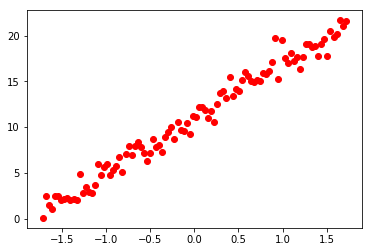

In [11]:
noise = np.random.randn(100)
print(noise)
x = np.linspace(0,10,100)
print(x)
y = 2*x+1+noise
print(y)
print(x.shape)
print(y.shape)
x=(x-x.mean())/x.std()
plt.scatter(x,y,c='r')

In [12]:
def hypothesis(theta,x):   #hypothesis function
    return theta[0]+theta[1]*x

def finderror(x,y,theta): #calculates summation of all individaul errors
    error = 0
    for ix in range(x.shape[0]):
        error+= (y[ix]-hypothesis(theta,x[ix]))**2 #calculates individual error and adds it to total error
    return error/(2*x.shape[0])

def gradient(theta,x,y): #calculates gradient summation over all training data
    grad = np.array([0,0])
    for xx in range(x.shape[0]):
        hx = hypothesis(theta,x[xx])
        grad[1] += (hx-y[xx])*x[xx]
        grad[0] += (hx-y[xx])
    return grad


def gradientscale(x,y,lr = .01): #gradient descend algorithm
    theta = np.zeros((2,1))     
    error_list = [1]
    while True:
        theta[0] = theta[0] - lr*gradient(theta,x,y)[0]
        theta[1] = theta[1] - lr*gradient(theta,x,y)[1]
        error = finderror(x,y,theta)
        error_list.append(error)
        perror = error_list[-2]
        if(perror-error<0.01):
            break
    return theta,error_list    

In [13]:
gra,error=gradientscale(x,y)

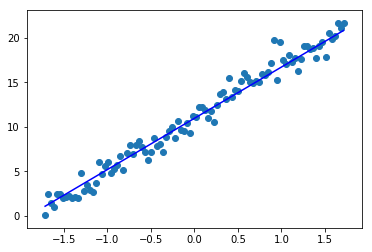

6


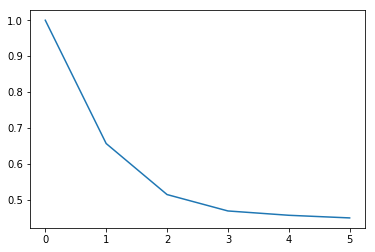

In [14]:
plt.plot(x,x*gra[1]+gra[0],c='b')
plt.scatter(x,y)
plt.show()
plt.plot(error)
print(len(error))